In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

Project Notebook.ipynb             important_features_submission.csv
README.md                          sample_submission.csv
first_submission.csv               test.csv
grid_search_submission.csv         train.csv


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
# Getting features, and numeric versus categorical features
feature_cols = train_df.columns[1:]
discrete_variables  = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']
numeric_variables = ["Age","RoomService", "Spa", "FoodCourt", "ShoppingMall", "VRDeck"]

In [6]:
# Quick view of Transported by each variable
train_df.groupby('Transported').count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  \
Transported                                                                 
False               4315        4217       4204   4216         4225  4226   
True                4378        4275       4272   4278         4286  4288   

              VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  
Transported                                                                  
False        4216         4217       4231          4221  4223    4225  4216  
True         4274         4295       4279          4264  4287    4280  4277

In [7]:
train_df.describe().T

count        mean          std  min   25%   50%   75%      max
Age           8514.0   28.827930    14.489021  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  224.687617   666.717663  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.077203  1611.489240  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  173.729169   604.696458  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.138778  1136.705535  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  304.854791  1145.717189  0.0   0.0   0.0  46.0  24133.0

In [8]:
# Checking Null Values
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# I can't just drop the nulls broadly, because they are widespread and we lose a lot of records
train_df.count(), train_df.dropna().count()

(PassengerId     8693
 HomePlanet      8492
 CryoSleep       8476
 Cabin           8494
 Destination     8511
 Age             8514
 VIP             8490
 RoomService     8512
 FoodCourt       8510
 ShoppingMall    8485
 Spa             8510
 VRDeck          8505
 Name            8493
 Transported     8693
 dtype: int64,
 PassengerId     6606
 HomePlanet      6606
 CryoSleep       6606
 Cabin           6606
 Destination     6606
 Age             6606
 VIP             6606
 RoomService     6606
 FoodCourt       6606
 ShoppingMall    6606
 Spa             6606
 VRDeck          6606
 Name            6606
 Transported     6606
 dtype: int64)

In [10]:
# Filling categorical Nulls for now, so that I can do some data viz - Removing as it messes with cabin and deck imputation
# train_df[discrete_variables] = train_df[discrete_variables].fillna('MISSING')

In [11]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

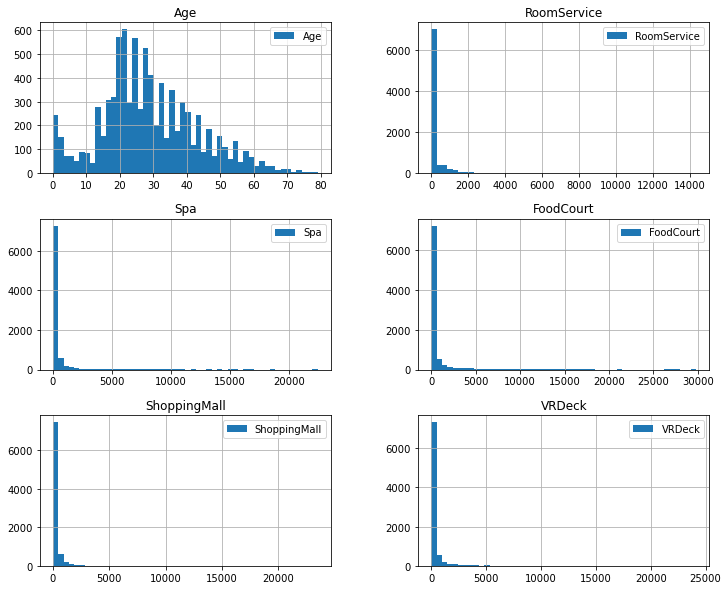

In [12]:
# Histograms for numeric variables - not normal
train_df[numeric_variables].hist(bins=50, figsize=(12, 10), legend=True)

plt.show()

In [13]:
# Checking unique values for discrete variables - Cabin is too unique
train_df[discrete_variables].nunique()

HomePlanet        3
CryoSleep         2
Destination       3
VIP               2
Cabin          6560
dtype: int64

Text(0.5, 0, 'Age (years)')

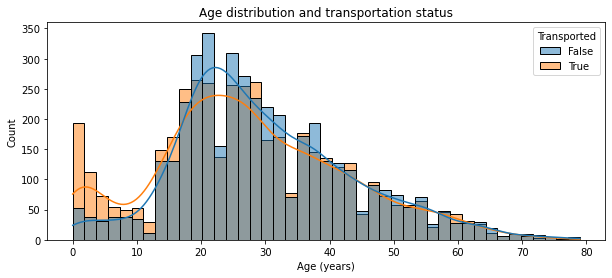

In [14]:
# Pretty similar distribution of transported versus not
plt.figure(figsize=(10,4))

sns.histplot(train_df, x=train_df["Age"], hue="Transported", kde=True)

# Aesthetics
plt.title("Age distribution and transportation status")
plt.xlabel("Age (years)")

<AxesSubplot:>

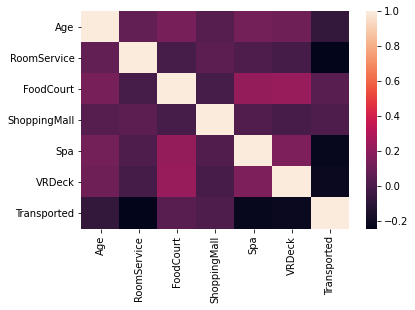

In [15]:
# Looking at data across all dimensions
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0.5, 0, 'Count of Passengers')

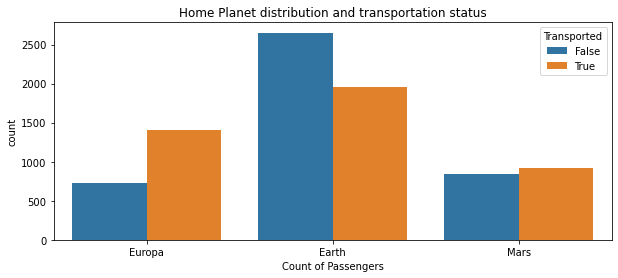

In [16]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="HomePlanet", hue="Transported")

# Aesthetics
plt.title("Home Planet distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

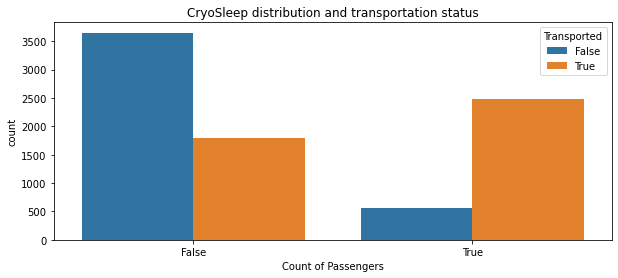

In [17]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="CryoSleep", hue="Transported")

# Aesthetics
plt.title("CryoSleep distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

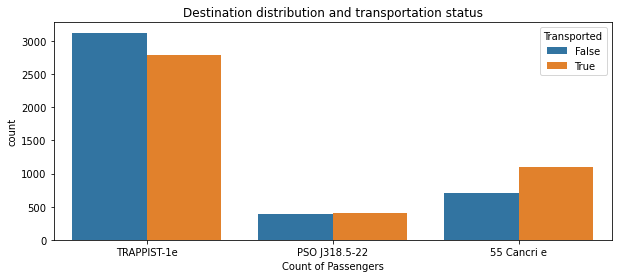

In [18]:
# Indifferent
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="Destination", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

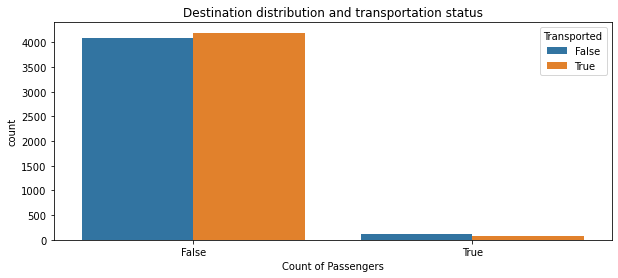

In [19]:
# Not enough people with VIP to matter
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="VIP", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

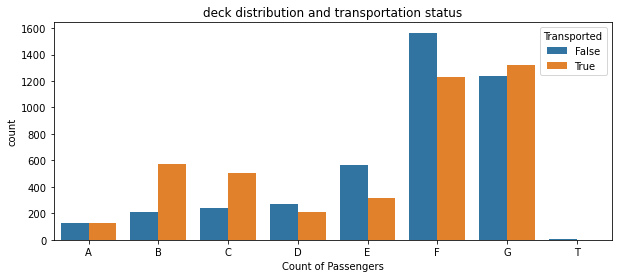

In [21]:
# Inspecting Cabin Feature Engineering....deck and cabin_type (made up names) could be good variables
plt.figure(figsize=(10,4))

train_df_cab = train_df.copy(deep=True)

train_df_cab['deck'] = train_df.Cabin.str[:1]
train_df_cab['cabin_type'] = train_df.Cabin.str[-1:]

sns.countplot(data=train_df_cab.sort_values(by='deck'), x="deck", hue="Transported")

# Aesthetics
plt.title("deck distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

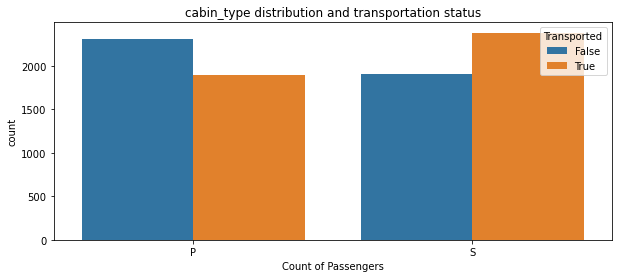

In [22]:
# Inspecting Cabin Feature Engineering....deck and cabin_type (made up names) could be good variables
plt.figure(figsize=(10,4))

train_df_cab = train_df.copy(deep=True)

train_df_cab['deck'] = train_df.Cabin.str[:1]
train_df_cab['cabin_type'] = train_df.Cabin.str[-1:]

sns.countplot(data=train_df_cab, x="cabin_type", hue="Transported")

# Aesthetics
plt.title("cabin_type distribution and transportation status")
plt.xlabel("Count of Passengers")

In [23]:
# Adding new cabin fields to train_df
train_df['deck'] = train_df.Cabin.str[:1]
train_df['cabin_type'] = train_df.Cabin.str[-1:]

discrete_variables.extend(['deck','cabin_type'])

# Filling categorical Nulls for now, so that I can do some data viz
train_df[discrete_variables] = train_df[discrete_variables].fillna('MISSING')

In [24]:
# Updating missing categorical variables....given the balance in missing and relatively low counts,
# I am going to fill based on mix of other values

imputed_df = train_df.copy(deep=True)

for variable in discrete_variables:
    # Getting MISSING indexes to fill with new values
    missing_indexes = train_df[train_df[variable]=='MISSING'].index
    
    # Creating new array with counts for each non-missing value
    non_missing_values = train_df[train_df[variable]!='MISSING'].groupby(by=variable).count()['PassengerId']
    
    # Setting options to fill missing values with
    value_options = list(non_missing_values.index)
    
    # Setting probabilities for random function to assign values
    value_mix = [x/sum(non_missing_values.values) for x in non_missing_values.values]
    
    # Creating array of values to populate
    missing_values = np.random.choice(value_options,len(missing_indexes), p=value_mix)
    
    # Assign values based on index of missing values and new values array
    imputed_df.loc[missing_indexes,variable] = missing_values


In [25]:
imputed_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck              0
cabin_type        0
dtype: int64

In [26]:
# Reviewing values to ensure loop worked
imputed_df.groupby(by='HomePlanet').count()

PassengerId  CryoSleep  Cabin  Destination   Age   VIP  \
HomePlanet                                                           
Earth              4712       4712   4712         4712  4624  4712   
Europa             2184       2184   2184         2184  2136  2184   
Mars               1797       1797   1797         1797  1754  1797   

            RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
HomePlanet                                                             
Earth              4607       4615          4595  4613    4601  4602   
Europa             2145       2137          2130  2137    2146  2135   
Mars               1760       1758          1760  1760    1758  1756   

            Transported  deck  cabin_type  
HomePlanet                                 
Earth              4712  4712        4712  
Europa             2184  2184        2184  
Mars               1797  1797        1797

In [27]:
train_df.groupby(by='HomePlanet').count()

PassengerId  CryoSleep  Cabin  Destination   Age   VIP  \
HomePlanet                                                           
Earth              4602       4602   4602         4602  4514  4602   
Europa             2131       2131   2131         2131  2085  2131   
MISSING             201        201    201          201   199   201   
Mars               1759       1759   1759         1759  1716  1759   

            RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
HomePlanet                                                             
Earth              4499       4505          4490  4503    4491  4496   
Europa             2095       2085          2078  2086    2094  2085   
MISSING             195        199           194   198     200   194   
Mars               1723       1721          1723  1723    1720  1718   

            Transported  deck  cabin_type  
HomePlanet                                 
Earth              4602  4602        4602  
Europa             2131  2131        2131  
MISSING             201   201         201  
Mars               1759  1759        1759

In [28]:
numeric_variables

['Age', 'RoomService', 'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck']

In [29]:
# Filling numeric variable nulls with zero, since distribution skews toward zero and median of all variables is 0
imputed_df = imputed_df.fillna(0)

In [30]:
imputed_df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported deck cabin_type  
0           False    B          P  
1            True    F          S  
2           False    A          S  
3           False    A          S  
4            True    F          S  
...           ...  ...        ...  
8688        False    A          P  
8689        False    G          S  
8690         True    G          S  
8691        False    E          S  
8692         True    E          S  

[8693 rows x 16 columns]

In [31]:
discrete_variables

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin',
 'deck',
 'cabin_type']

In [32]:
# Feature encoding - Given the lack of signal for most, I am only going to use CryoSleep, HomePlanet, Destination
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

# imputed_df.drop(['Cabin'],inplace=True)

updated_discrete_variable = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'cabin_type']

cat_df = pd.get_dummies(imputed_df[updated_discrete_variable], drop_first=False)

In [33]:
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
num_df = pd.DataFrame(scaler.fit_transform(imputed_df[numeric_variables]),columns=numeric_variables)

In [34]:
train_df.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [36]:
final_feature_df = pd.merge(cat_df,num_df,left_index=True,right_index=True)
                            
final_feature_df.head()

CryoSleep    VIP  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0      False  False                 0                  1                0   
1      False  False                 1                  0                0   
2      False   True                 0                  1                0   
3      False  False                 0                  1                0   
4      False  False                 1                  0                0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Destination_TRAPPIST-1e  deck_A  deck_B  ...  deck_G  deck_T  cabin_type_P  \
0                        1       0       1  ...       0       0             1   
1                        1       0       0  ...       0       0             0   
2                        1       1       0  ...       0       0             0   
3                        1       1       0  ...       0       0             0   
4                        1       0       0  ...       0       0             0   

   cabin_type_S       Age  RoomService       Spa  FoodCourt  ShoppingMall  \
0             0  0.493671     0.000000  0.000000   0.000000      0.000000   
1             1  0.303797     0.007608  0.024500   0.000302      0.001064   
2             1  0.734177     0.003001  0.299670   0.119948      0.000000   
3             1  0.417722     0.000000  0.148563   0.043035      0.015793   
4             1  0.202532     0.021149  0.025214   0.002348      0.006428   

     VRDeck  
0  0.000000  
1  0.001823  
2  0.002030  
3  0.007997  
4  0.000083  

[5 rows x 24 columns]

In [37]:
len(final_feature_df.columns)

24

In [38]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 150)

X_train, X_test, y_train, y_test = train_test_split(final_feature_df, train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [39]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7866589994249569


In [40]:
# Setting up test_df for submission

# Adding new cabin fields to test_df
test_df['deck'] = test_df.Cabin.str[:1]
test_df['cabin_type'] = test_df.Cabin.str[-1:]

# Filling categorical Nulls for now, so that I can do some data viz
test_df[discrete_variables] = test_df[discrete_variables].fillna('MISSING')

# Updating missing categorical variables....given the balance in missing and relatively low counts,
# I am going to fill based on mix of other values

imputed_test_df = test_df.copy(deep=True)

for variable in discrete_variables:
    # Getting MISSING indexes to fill with new values
    missing_indexes = test_df[test_df[variable]=='MISSING'].index
    
    # Creating new array with counts for each non-missing value
    non_missing_values = test_df[test_df[variable]!='MISSING'].groupby(by=variable).count()['PassengerId']
    
    # Setting options to fill missing values with
    value_options = list(non_missing_values.index)
    
    # Setting probabilities for random function to assign values
    value_mix = [x/sum(non_missing_values.values) for x in non_missing_values.values]
    
    # Creating array of values to populate
    missing_values = np.random.choice(value_options,len(missing_indexes), p=value_mix)
    
    # Assign values based on index of missing values and new values array
    imputed_test_df.loc[missing_indexes,variable] = missing_values

imputed_test_df = imputed_test_df.fillna(0)

# Feature encoding - Given the lack of signal for most, I am only going to use CryoSleep, HomePlanet, Destination
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

# imputed_df.drop(['Cabin'],inplace=True)

updated_discrete_variable = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'cabin_type']

cat_test_df = pd.get_dummies(imputed_test_df[updated_discrete_variable], drop_first=False)

# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
num_test_df = pd.DataFrame(scaler.fit_transform(imputed_df[numeric_variables]),columns=numeric_variables)

final_test_feature_df = pd.merge(cat_test_df,num_test_df,left_index=True,right_index=True)
                            
final_test_feature_df.head()


CryoSleep    VIP  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0       True  False                 1                  0                0   
1      False  False                 1                  0                0   
2       True  False                 0                  1                0   
3      False  False                 0                  1                0   
4      False  False                 1                  0                0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                        0                          0   
1                        0                          0   
2                        1                          0   
3                        0                          0   
4                        0                          0   

   Destination_TRAPPIST-1e  deck_A  deck_B  ...  deck_G  deck_T  cabin_type_P  \
0                        1       0       0  ...       1       0             0   
1                        1       0       0  ...       0       0             0   
2                        0       0       0  ...       0       0             0   
3                        1       0       0  ...       0       0             0   
4                        1       0       0  ...       0       0             0   

   cabin_type_S       Age  RoomService       Spa  FoodCourt  ShoppingMall  \
0             1  0.493671     0.000000  0.000000   0.000000      0.000000   
1             1  0.303797     0.007608  0.024500   0.000302      0.001064   
2             1  0.734177     0.003001  0.299670   0.119948      0.000000   
3             1  0.417722     0.000000  0.148563   0.043035      0.015793   
4             1  0.202532     0.021149  0.025214   0.002348      0.006428   

     VRDeck  
0  0.000000  
1  0.001823  
2  0.002030  
3  0.007997  
4  0.000083  

[5 rows x 24 columns]

In [41]:
test_df['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [42]:
y_sub = clf.predict(final_test_feature_df)

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('first_submission.csv',index=False)

### To Do
3. Remove un-important features
4. Gridsearch/optimization
5. Make a pipeline?
6. Compute missing values using a machine learning method
7. Try different model types

## Looking at feature importance and reducing features

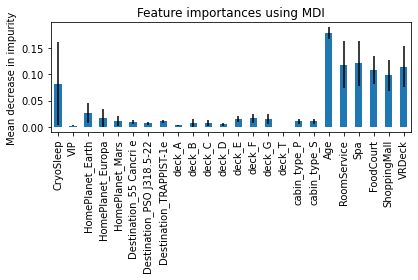

In [43]:
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=final_test_feature_df.columns)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [44]:
important_features = ['Age','RoomService','Spa','FoodCourt','ShoppingMall','VRDeck'] # Adding Cryosleep makes the result worse

X_train, X_test, y_train, y_test = train_test_split(final_feature_df[important_features], train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7860839562967222


In [45]:
# Reducing features and resubmitting
y_sub = clf.predict(final_test_feature_df[important_features])

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('important_features_submission.csv',index=False)

# Score: 0.49988

In [46]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Applying Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV


parameters = {'n_estimators':(500,1000), 'max_depth':[5,10],'criterion':['gini','entropy','log_loss'],
                         'min_samples_split':[12,25,50]}
algo = RandomForestClassifier()

clf_gs = GridSearchCV(algo, parameters,verbose=3)

clf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500, score=0.781, total=   1.0s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500, score=0.799, total=   1.0s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500, score=0.779, total=   1.0s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500 
[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500, score=0.783, total=   1.0s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500 
[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500, score=0.801, total=   1.1s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000 
[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000, score=0.779, total=   2.1s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000 
[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000, score=0.798, total=   2.1s
[CV] criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000 
[CV]  criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000, score=0.778, total=   2.1s
[CV] criteri

[CV]  criterion=gini, max_depth=10, min_samples_split=25, n_estimators=1000, score=0.796, total=   2.8s
[CV] criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500, score=0.784, total=   1.4s
[CV] criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500, score=0.799, total=   1.3s
[CV] criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500, score=0.790, total=   1.4s
[CV] criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500, score=0.788, total=   1.4s
[CV] criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=gini, max_depth=10, min_samples_split=50, n_estimators=500, score=0.795, total=   1.4s
[CV] c

[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=500, score=0.796, total=   1.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000, score=0.785, total=   3.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000, score=0.796, total=   3.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000, score=0.792, total=   3.3s
[CV] criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000, score=0.789, total=   3.4s
[CV] criterion=entropy, max_depth=10, min_samples_split=12, n_estimators=1000 
[CV]  criterion=entropy, max_depth=10, min_samples_split=12, n_estimato

/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=5, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=12, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=25, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500 
[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=500, score=nan, total=   0.1s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s
[CV] criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000 


/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/tylerdrumheller/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/tylerdrumheller/opt/anaco

[CV]  criterion=log_loss, max_depth=10, min_samples_split=50, n_estimators=1000, score=nan, total=   0.2s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10],
                         'min_samples_split': [12, 25, 50],
                         'n_estimators': (500, 1000)},
             verbose=3)

In [48]:
clf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 50,
 'n_estimators': 500}

In [49]:
clf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 50,
 'n_estimators': 500}

In [53]:
clf = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=50,n_estimators = 500)

X_train, X_test, y_train, y_test = train_test_split(final_feature_df, train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8125359401955147


In [61]:
# Re-training model with all train data
clf.fit(final_feature_df,train_df.Transported)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=50,
                       n_estimators=500)

In [62]:
y_sub = clf.predict(final_test_feature_df)

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('grid_search_submission.csv',index=False)

In [63]:
!conda config --add channels conda-forge

In [ ]:
!conda install catboost

Solving environment: \ 

In [ ]:
!pip install ipywidgets